## Ordinary Differential Equations (ODEs)

In [2]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time
from scipy.integrate import odeint

y:  0.1 Steps:  419
y:  0.2 Steps:  403
y:  0.3 Steps:  456
y:  0.4 Steps:  473
y:  0.5 Steps:  529
y:  0.6 Steps:  532
y:  0.7 Steps:  537
y:  0.8 Steps:  518
y:  0.9 Steps:  506
y:  1.0 Steps:  532
y:  1.1 Steps:  513
y:  1.2 Steps:  489


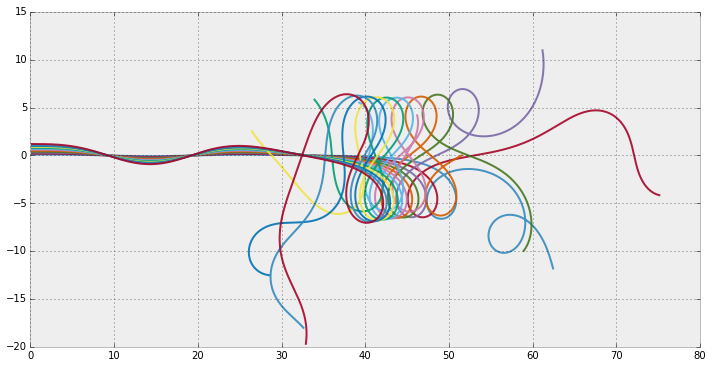

In [19]:
## Example problem: Circular orbit in magnetic field

def B(t, x):
    return np.sin(0.1*x[0])*np.sin(0.1*x[1])*np.array([0., 0., 1.])

def f(t, y, z):
    return z

def g(t, y, z):
    q = 1
    m = 1
    return q*np.cross(z, B(t, y))/m

def rungeKutta(h, t, y, z, f, g):
    k1 = f(t, y, z)
    l1 = g(t, y, z)
    k2 = f(t + h/2, y+h*k1/2, z+h*l1/2)
    l2 = g(t + h/2, y+h*k1/2, z+h*l1/2)
    k3 = f(t + h/2, y+h*k2/2, z+h*l2/2)
    l3 = g(t + h/2, y+h*k2/2, z+h*l2/2)
    k4 = f(t + h,   y+h*k3,   z+h*l3)
    l4 = g(t + h,   y+h*k3,   z+h*l3)
    y_new = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    z_new = z + h*(l1 + 2*l2 + 2*l3 + l4)/6
    return y_new, z_new

def stepper(h, t, x, v, f, g, integrator):
    # Step once, with stepsize h
    x1, v1 = integrator(h, t, x, v, f, g)
    # Step twice, with stepsize h/2
    x2, v2 = integrator(h/2, t, x, v, f, g)
    x2, v2 = integrator(h/2, t, x2, v2, f, g)
    # calculate error
    
    err = np.linalg.norm(x2-x1)/np.linalg.norm(x2)
    # Return x2, v2, which are presumable more accurate
    return x2, v2, err

def variableIntegrate(Tmax, h0, x, v, tol, integrator):
    T  = []
    X  = []
    V  = []    
    # Start at time 0, with initial guess of stepsize
    t = 0
    h = h0
    while t < Tmax:
        T.append(t)
        flag = True
        while flag:
            x1, v1, err = stepper(h, t, x, v, f, g, integrator)
            if err > tol:
                h = h/2
            else:
                t += h
                h = 1.5*h
                x = x1
                v = v1
                flag = False
        X.append(x)
        V.append(v)
    T = np.array(T)
    X = np.array(X)
    V = np.array(V)
    return T, X, V

# Parameters
Tmax = 30*np.pi
h0   = 1e-1
tol  = 1e-9

# Figure parameters
plt.figure(figsize = (12,6))
linewidth = 2
alpha = 0.9
for y in np.linspace(0.1, 1.2, 12):
    # Initial values
    x0   = np.array([0., y, 0.])
    v0   = np.array([1., 0., 0.])
    # Solve problem
    Tr, Xr, Vr = variableIntegrate(Tmax, h0, x0, v0, tol, rungeKutta)
    # plot
    plt.plot(Xr[:,0], Xr[:,1], label = str(y), lw = linewidth, alpha = alpha)
    print('y: ', y, 'Steps: ', len(Tr))


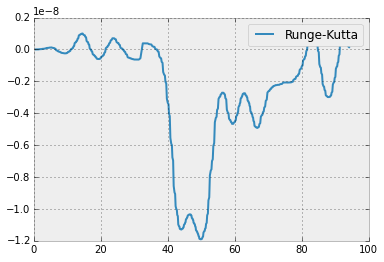

In [20]:
# Check conservation of energy
# Plot E(t)/E(t=0) - 1
for V, T, label in [(Vr, Tr, 'Runge-Kutta')]:
    E0 = 0.5*(V[0,0]**2+V[0,1]**2+V[0,2]**2)
    plt.plot(T, 0.5*(V[:,0]**2+V[:,1]**2+V[:,2]**2)/E0-1, label = label)
plt.legend()

/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


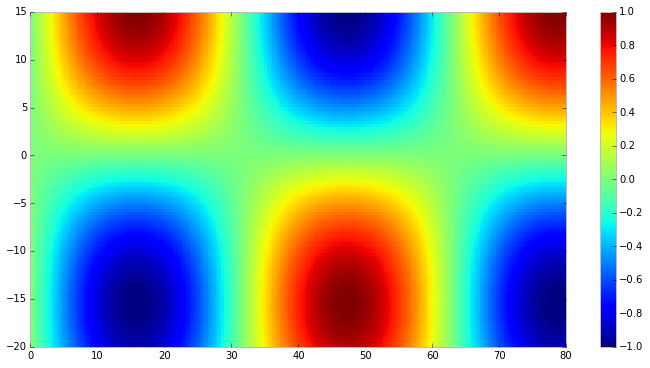

In [16]:

def B(x, y):
    return np.sin(0.1*x)*np.sin(0.1*y)
    
X = np.linspace(0, 80, 200)
Y = np.linspace(-20, 15, 100)
X, Y = np.meshgrid(X, Y)
# Figure parameters
plt.figure(figsize = (12,6))
mesh = plt.pcolormesh(X, Y, B(X, Y))
plt.colorbar(mesh)